![clothing_classification](clothing_classification.png)


Fashion Forward is a new AI-based e-commerce clothing retailer.
They want to use image classification to automatically categorize new product listings, making it easier for customers to find what they're looking for. It will also assist in inventory management by quickly sorting items.

As a data scientist tasked with implementing a garment classifier, your primary objective is to develop a machine learning model capable of accurately categorizing images of clothing items into distinct garment types such as shirts, trousers, shoes, etc.

In [48]:
# Run the cells below first

In [49]:
!pip install torchmetrics
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [50]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchmetrics import Accuracy, Precision, Recall

In [51]:
# Load datasets
from torchvision import datasets
import torchvision.transforms as transforms

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [52]:
# Start coding here
# Use as many cells as you need
# Get the number of classes
num_classes = len(train_data.classes)
num_classes

10

In [53]:
# Displaying Images
dataloader_train = DataLoader(
                train_data,
                shuffle=True,
                batch_size=1,)

In [54]:
image, label = next(iter(dataloader_train))
print(image.shape)

torch.Size([1, 1, 28, 28])


In [55]:
# Reshaping Image dimensions and squeezing 
image = image.squeeze(0).permute(1, 2, 0)
print(image.shape)

torch.Size([28, 28, 1])


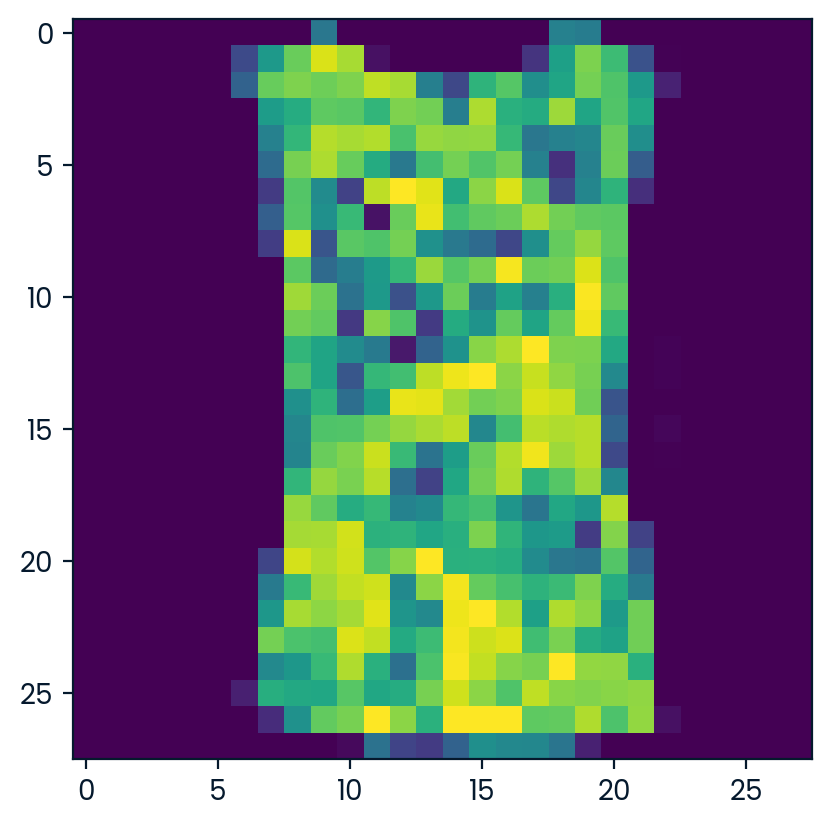

In [56]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [57]:
# Create a CNN Model
class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.feature_extractor = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        nn.ELU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ELU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Flatten(),)
        self.classifier = nn.Linear(64*7*7, num_classes)
    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

In [58]:
# Training Image Classifiers
net = Net(num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(1):
    running_loss = 0.0
    for images, labels in dataloader_train:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss/len(dataloader_train)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}')

Epoch 1, Loss: 0.4188


In [59]:
# Get the DataLoader for test set
dataloader_test = DataLoader(
                test_data,
                shuffle=True,
                batch_size=1,)

In [60]:
# Evaluating Image Classifiers
acc = Accuracy(task='multiclass', num_classes=num_classes)
metric_precision = Precision(task='multiclass', num_classes=num_classes, average=None)
metric_recall = Recall(task='multiclass', num_classes=num_classes, average=None)

predictions = []
net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, pred = torch.max(outputs, 1)
        acc(pred, labels)
        metric_precision(pred, labels)
        metric_recall(pred, labels)
        predictions.extend(pred.tolist())

accuracy = float(acc.compute())
precision = list(metric_precision.compute())
recall = list(metric_recall.compute())

In [61]:
# Analyzing performance per class for recall
{k: recall[v].item()
    for k, v 
    in test_data.class_to_idx.items()}

{'T-shirt/top': 0.871999979019165,
 'Trouser': 0.9750000238418579,
 'Pullover': 0.8840000033378601,
 'Dress': 0.8629999756813049,
 'Coat': 0.75,
 'Sandal': 0.9639999866485596,
 'Shirt': 0.6420000195503235,
 'Sneaker': 0.9610000252723694,
 'Bag': 0.9779999852180481,
 'Ankle boot': 0.953000009059906}

In [62]:
# Analyzing performance per class for precision
{k: precision[v].item()
    for k, v 
    in test_data.class_to_idx.items()}

{'T-shirt/top': 0.8029465675354004,
 'Trouser': 0.9959142208099365,
 'Pullover': 0.7660312056541443,
 'Dress': 0.8933747410774231,
 'Coat': 0.8493770956993103,
 'Sandal': 0.9757084846496582,
 'Shirt': 0.7047200798988342,
 'Sneaker': 0.9375609755516052,
 'Bag': 0.9560117125511169,
 'Ankle boot': 0.9675126671791077}

In [64]:
accuracy

0.8841999769210815